<a href="https://colab.research.google.com/github/CastilloDev4/ProyectoLenguajeSenas/blob/main/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


In [ ]:
#Descargo el dataset
!kaggle datasets download -d datamunge/sign-language-mnist

Dataset URL: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
License(s): CC0-1.0
100% 62.6M/62.6M [00:00<00:00, 225MB/s]
100% 62.6M/62.6M [00:00<00:00, 214MB/s]


In [ ]:
#Archivo descomprimido
!unzip sign-language-mnist.zip


Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [ ]:
#Carga de los datos
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')


In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
#Separo las etiquetas
y_train = train['label']
y_test = test['label']
#Las elimino del conjunto de datos
x_train = train.drop('label', axis=1)
x_test = test.drop('label', axis=1)




In [ ]:
x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
print(y_train[:10])

0     3
1     6
2     2
3     2
4    13
5    16
6     8
7    22
8     3
9     3
Name: label, dtype: int64


In [ ]:
#Normalizo los datos  para tener valores entre 0 y 1
x_train = x_train.values/ 255.0
x_test = x_test.values / 255.0


In [ ]:
print(x_train.shape)
print(x_test.shape)



(27455, 784)
(7172, 784)


In [ ]:
# Aplicar One-Hot Encoding a las etiquetas con to_categorical
y_train_encoded = to_categorical(y_train, num_classes=25)
y_test_encoded = to_categorical(y_test, num_classes=25)

In [ ]:
print("Etiquetas originales:")
print(y_train[:10])

print("\nEtiquetas One-Hot Encoding:")
print(y_train_encoded[:10])

Etiquetas originales:
0     3
1     6
2     2
3     2
4    13
5    16
6     8
7    22
8     3
9     3
Name: label, dtype: int64

Etiquetas One-Hot Encoding:
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]


In [ ]:
# Dividir el conjunto de entrenamiento en entrenamiento y prueba, esto evita el sobreajuste
# sklearn.model_selection divide matrices o marcos de datos en subconjuntos aleatorios de entrenamiento y prueba.
# Se utiliza el 80% para entrenamiento y el 20% para prueba o validacion.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train_encoded, test_size=0.2)


In [ ]:
x_train[0]

array([0.31372549, 0.34901961, 0.35686275, 0.37647059, 0.40392157,
       0.43137255, 0.45882353, 0.48235294, 0.50980392, 0.52941176,
       0.54901961, 0.57254902, 0.58823529, 0.60392157, 0.61568627,
       0.62352941, 0.63529412, 0.63921569, 0.63529412, 0.64313725,
       0.63921569, 0.63921569, 0.63921569, 0.63921569, 0.63921569,
       0.63137255, 0.62352941, 0.61568627, 0.3254902 , 0.35294118,
       0.36078431, 0.39215686, 0.41960784, 0.43921569, 0.46666667,
       0.49019608, 0.51372549, 0.5372549 , 0.55294118, 0.58039216,
       0.59607843, 0.61176471, 0.62745098, 0.63921569, 0.64705882,
       0.65098039, 0.65490196, 0.65490196, 0.65490196, 0.65098039,
       0.65490196, 0.65490196, 0.65098039, 0.64313725, 0.64313725,
       0.64313725, 0.3372549 , 0.35294118, 0.36862745, 0.4       ,
       0.43137255, 0.45490196, 0.4745098 , 0.49803922, 0.52156863,
       0.54509804, 0.56078431, 0.58431373, 0.6       , 0.62745098,
       0.63529412, 0.64705882, 0.6627451 , 0.6627451 , 0.66666

In [ ]:
# Función para mostrar predicciones
def mostrar_predicciones(x_test, y_true_classes, y_pred_classes, num_images=25):
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        idx = np.random.randint(0, len(y_true_classes))
        img = x_test[idx].reshape(28, 28)
        true_label = y_true_classes[idx]
        predicted_label = y_pred_classes[idx]

        plt.subplot(5, 5, i + 1)
        plt.imshow(img, cmap='gray')
        if true_label == predicted_label:
            plt.title(f'Pred: {predicted_label}', color='green')
        else:
            plt.title(f'True: {true_label}\nPred: {predicted_label}', color='red')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
#MODELO 1.  Funcion de activación Relu y optimizador Adam (por defecto)
# Definición del modelo 3 CAPAS. BATCH SIZE 128 Y 50 ITERACIONES
modelo1 = Sequential()
modelo1.add(Dense(256, activation='relu', input_shape=(28*28,)))
modelo1.add(Dense(128, activation='relu'))
modelo1.add(Dense(25, activation='softmax'))

# Compilación del modelo
modelo1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamiento del modelo
history = modelo1.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_val, y_val))




Epoch 1/50
172/172 [==============================] - 3s 9ms/step - loss: 2.3197 - accuracy: 0.3213 - val_loss: 1.7053 - val_accuracy: 0.4637
Epoch 2/50
172/172 [==============================] - 1s 8ms/step - loss: 1.4112 - accuracy: 0.5670 - val_loss: 1.2177 - val_accuracy: 0.6188
Epoch 3/50
172/172 [==============================] - 1s 8ms/step - loss: 1.0716 - accuracy: 0.6729 - val_loss: 0.9695 - val_accuracy: 0.7081
Epoch 4/50
172/172 [==============================] - 1s 8ms/step - loss: 0.8496 - accuracy: 0.7383 - val_loss: 0.8428 - val_accuracy: 0.7210
Epoch 5/50
172/172 [==============================] - 1s 8ms/step - loss: 0.6736 - accuracy: 0.7977 - val_loss: 0.6120 - val_accuracy: 0.8090
Epoch 6/50
172/172 [==============================] - 1s 8ms/step - loss: 0.5550 - accuracy: 0.8360 - val_loss: 0.5440 - val_accuracy: 0.8230
Epoch 7/50
172/172 [==============================] - 2s 10ms/step - loss: 0.4416 - accuracy: 0.8728 - val_loss: 0.3697 - val_accuracy: 0.8984
Epoch

In [ ]:
test_loss, test_accuracy = modelo1.evaluate(x_test, y_test_encoded)
print(f" {test_accuracy}")

225/225 [==============================] - 1s 2ms/step - loss: 1.3522 - accuracy: 0.7697
 0.7696598172187805


In [ ]:
# Predicciones
#np.argmax se utiliza para convertir las predicciones de probabilidades y las etiquetas one-hot en índices de clase
y_pred1 = modelo1.predict(x_test)
y_pred_classes1 = np.argmax(y_pred1, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)
# Reporte de clasificación
print(classification_report(y_true_classes, y_pred_classes1))

# Matriz de confusión
conf_matrix1 = confusion_matrix(y_true_classes, y_pred_classes1)
print(conf_matrix1)

225/225 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       331
           1       0.98      0.91      0.94       432
           2       0.75      0.98      0.85       310
           3       0.81      0.84      0.82       245
           4       0.91      0.92      0.92       498
           5       0.83      0.91      0.87       247
           6       0.93      0.82      0.87       348
           7       0.97      0.87      0.92       436
           8       0.71      0.83      0.77       288
          10       0.80      0.53      0.64       331
          11       0.74      0.72      0.73       209
          12       0.73      0.84      0.78       394
          13       0.89      0.56      0.68       291
          14       0.89      0.66      0.76       246
          15       0.98      0.93      0.95       347
          16       0.65      0.76      0.70       164
          17       0.33   

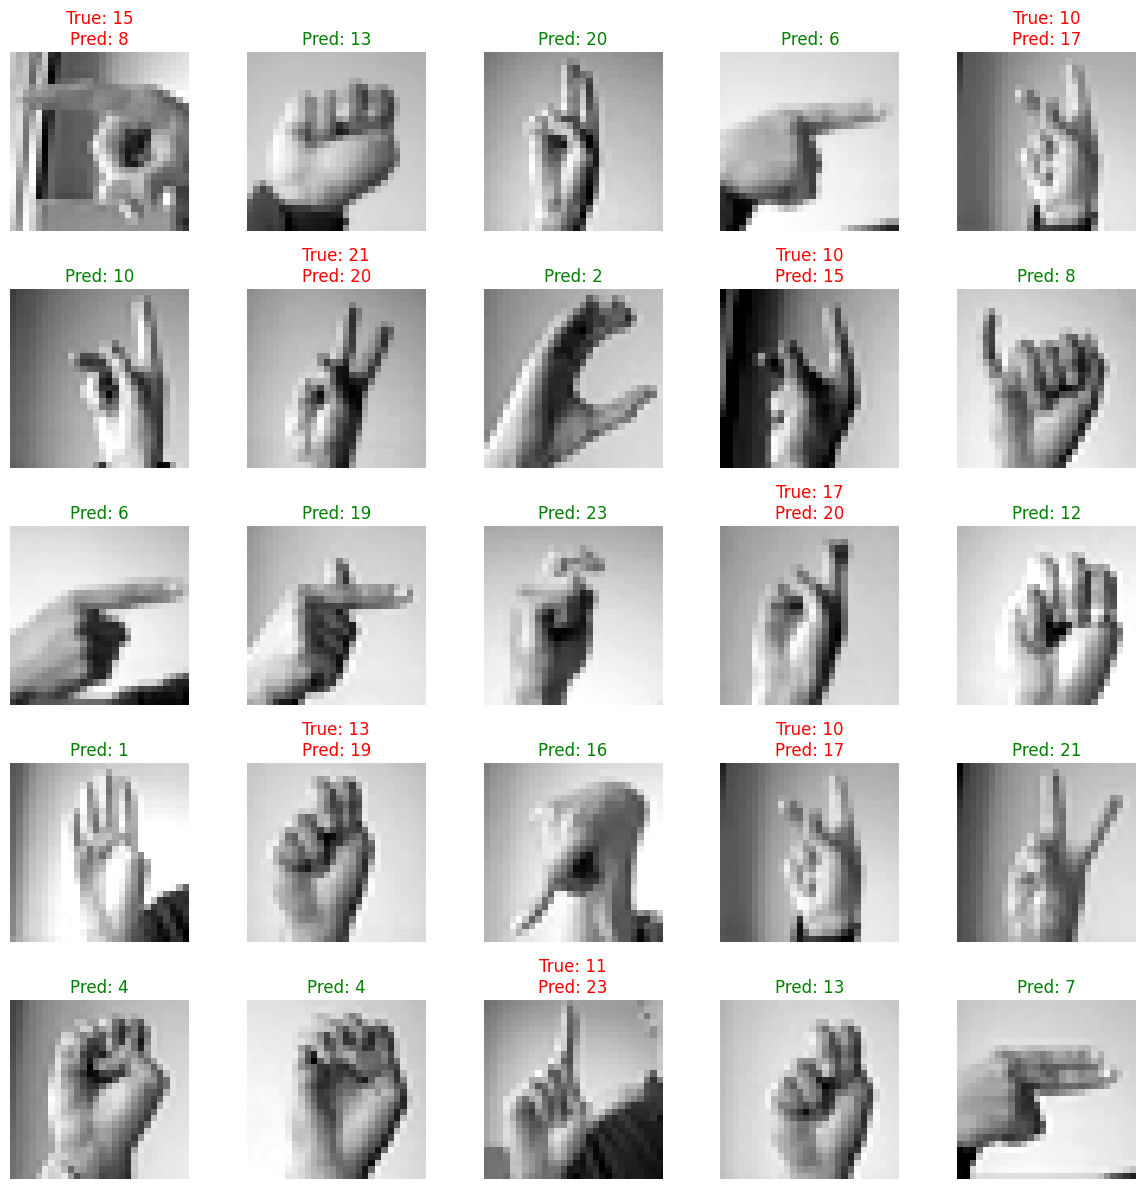

In [ ]:
mostrar_predicciones(x_test, y_true_classes, y_pred_classes1)


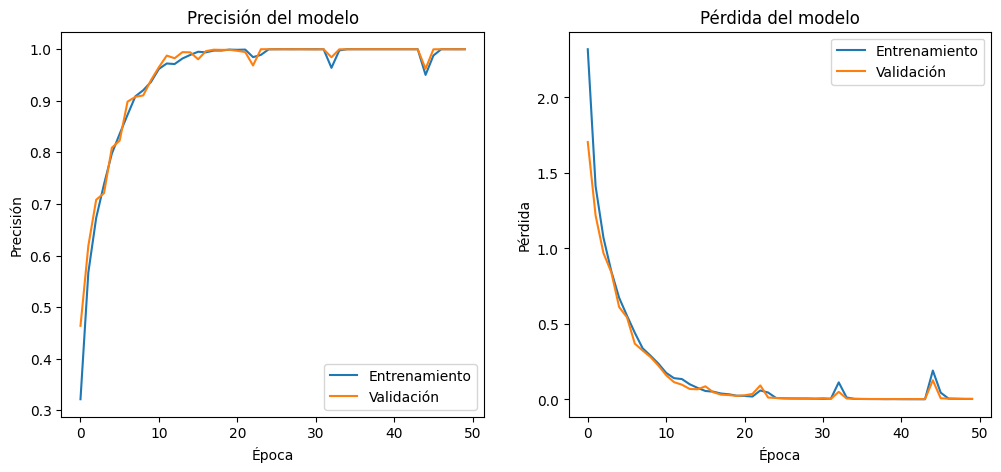

In [ ]:
# Graficar la precisión del modelo
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
# Graficar la pérdida del modelo
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')

In [ ]:
#MODELO 4 con 5 capas, 70 iteraciones y mayor numero de neuronas
modelo4 = Sequential()
modelo4.add(Dense(512, activation='relu', input_shape=(28*28,)))
modelo4.add(Dense(256, activation='relu'))
modelo4.add(Dense(128, activation='relu'))
modelo4.add(Dense(64, activation='relu'))
modelo4.add(Dense(25, activation='softmax'))

modelo4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history4 = modelo4.fit(x_train, y_train, epochs=70, batch_size=128, validation_data=(x_val, y_val))

test_loss, test_accuracy = modelo4.evaluate(x_test, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")

Epoch 1/70
172/172 [==============================] - 5s 22ms/step - loss: 2.4913 - accuracy: 0.2336 - val_loss: 1.7444 - val_accuracy: 0.4311
Epoch 2/70
172/172 [==============================] - 2s 14ms/step - loss: 1.4546 - accuracy: 0.5151 - val_loss: 1.1096 - val_accuracy: 0.6438
Epoch 3/70
172/172 [==============================] - 2s 14ms/step - loss: 0.9841 - accuracy: 0.6716 - val_loss: 0.7988 - val_accuracy: 0.7157
Epoch 4/70
172/172 [==============================] - 2s 14ms/step - loss: 0.6750 - accuracy: 0.7767 - val_loss: 0.5267 - val_accuracy: 0.8141
Epoch 5/70
172/172 [==============================] - 3s 17ms/step - loss: 0.4414 - accuracy: 0.8534 - val_loss: 0.3654 - val_accuracy: 0.8780
Epoch 6/70
172/172 [==============================] - 4s 23ms/step - loss: 0.3489 - accuracy: 0.8833 - val_loss: 0.2402 - val_accuracy: 0.9290
Epoch 7/70
172/172 [==============================] - 3s 15ms/step - loss: 0.2142 - accuracy: 0.9368 - val_loss: 0.2351 - val_accuracy: 0.9261

In [ ]:
# Predicciones
y_pred4 = modelo4.predict(x_test)
y_pred_classes4 = np.argmax(y_pred4, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)
# Reporte de clasificación
print(classification_report(y_true_classes, y_pred_classes4))

# Matriz de confusión
conf_matrix4 = confusion_matrix(y_true_classes, y_pred_classes4)
print(conf_matrix4)

225/225 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       331
           1       1.00      0.88      0.94       432
           2       0.89      0.92      0.90       310
           3       0.88      0.81      0.84       245
           4       0.88      0.96      0.91       498
           5       0.71      0.85      0.78       247
           6       0.79      0.82      0.80       348
           7       1.00      0.95      0.97       436
           8       0.90      0.72      0.80       288
          10       0.66      0.62      0.64       331
          11       0.81      0.91      0.86       209
          12       0.88      0.80      0.84       394
          13       0.71      0.53      0.60       291
          14       0.89      0.65      0.76       246
          15       0.85      1.00      0.92       347
          16       0.63      0.99      0.77       164
          17       0.50   

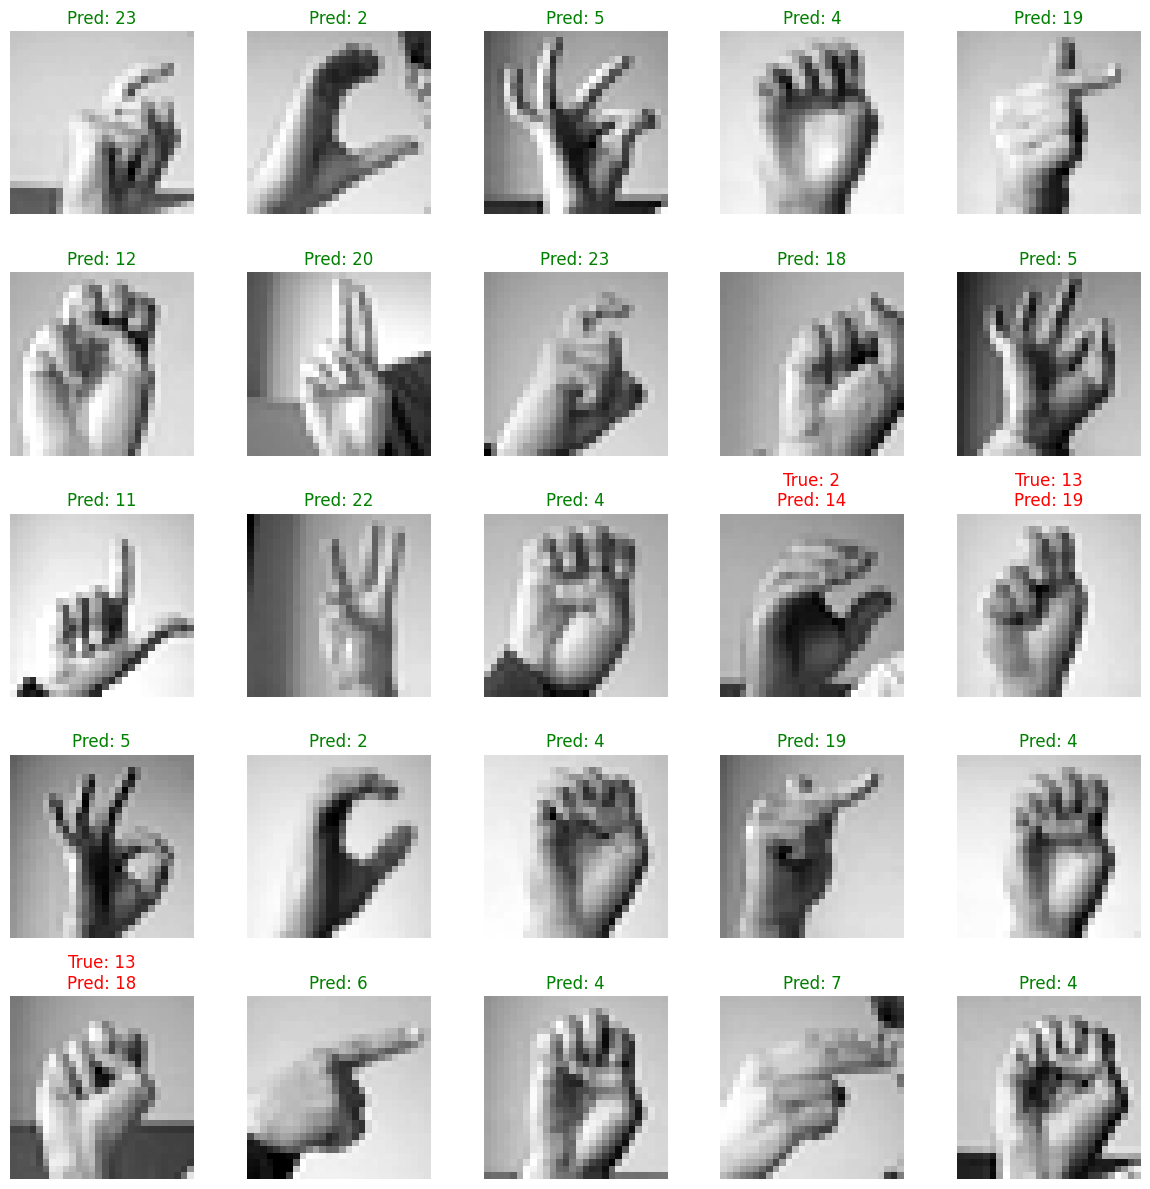

In [ ]:
mostrar_predicciones(x_test, y_true_classes, y_pred_classes4)


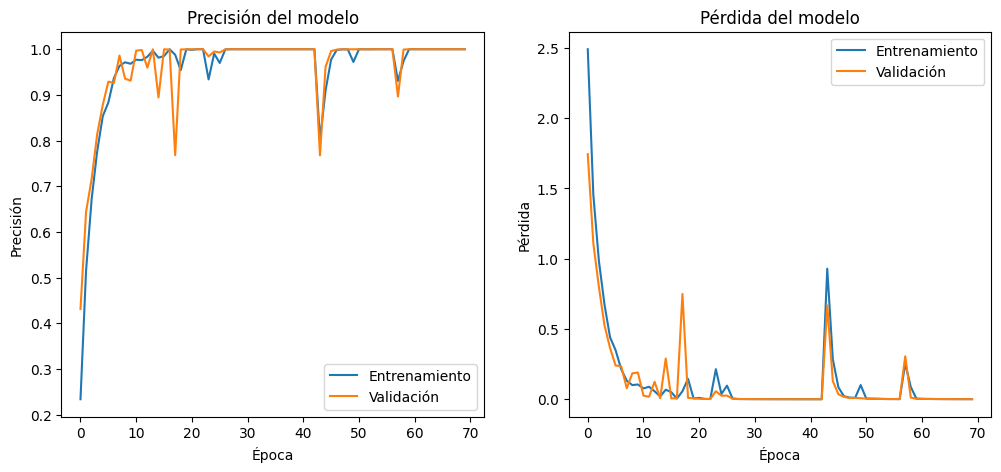

In [ ]:
# Graficar la precisión del modelo
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
# Graficar la pérdida del modelo
plt.subplot(1, 2, 2)
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')

In [ ]:
#  Segundo modelo
#MODELO 2.  Funcion de activación Relu y optimizador Adam
# 5 CAPAS, BATCH SIZE 256 Y 70 ITERACIONES con Dropout de 0.2

modelo2 = Sequential()
modelo2.add(Dense(512, activation='relu', input_shape=(28*28,)))
modelo2.add(Dropout(0.2))
modelo2.add(Dense(256, activation='relu'))
modelo2.add(Dropout(0.2))
modelo2.add(Dense(128, activation='relu'))
modelo2.add(Dropout(0.2))
modelo2.add(Dense(64, activation='relu'))
modelo2.add(Dropout(0.2))
modelo2.add(Dense(25, activation='softmax'))

# Compilación del modelo
modelo2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamiento del modelo
history2= modelo2.fit(x_train, y_train, epochs=70, batch_size=256, validation_data=(x_val, y_val))


Epoch 1/70
86/86 [==============================] - 3s 27ms/step - loss: 3.0998 - accuracy: 0.0693 - val_loss: 2.7535 - val_accuracy: 0.1510
Epoch 2/70
86/86 [==============================] - 2s 24ms/step - loss: 2.4529 - accuracy: 0.2127 - val_loss: 1.8852 - val_accuracy: 0.3966
Epoch 3/70
86/86 [==============================] - 3s 32ms/step - loss: 1.8575 - accuracy: 0.3714 - val_loss: 1.3945 - val_accuracy: 0.5469
Epoch 4/70
86/86 [==============================] - 3s 40ms/step - loss: 1.5393 - accuracy: 0.4728 - val_loss: 1.1361 - val_accuracy: 0.6050
Epoch 5/70
86/86 [==============================] - 2s 25ms/step - loss: 1.2997 - accuracy: 0.5528 - val_loss: 0.9296 - val_accuracy: 0.6911
Epoch 6/70
86/86 [==============================] - 2s 24ms/step - loss: 1.1371 - accuracy: 0.6039 - val_loss: 0.7470 - val_accuracy: 0.7527
Epoch 7/70
86/86 [==============================] - 2s 25ms/step - loss: 1.0185 - accuracy: 0.6463 - val_loss: 0.6963 - val_accuracy: 0.7824
Epoch 8/70
86

In [ ]:
test_loss, test_accuracy = modelo2.evaluate(x_test, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")

225/225 [==============================] - 1s 3ms/step - loss: 0.9773 - accuracy: 0.7755
Test accuracy: 0.7755159139633179


In [ ]:
# Predicciones
y_pred2 = modelo2.predict(x_test)
y_pred_classes2 = np.argmax(y_pred2, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)
# Reporte de clasificación
print(classification_report(y_true_classes, y_pred_classes2))

# Matriz de confusión
conf_matrix2 = confusion_matrix(y_true_classes, y_pred_classes2)
print(conf_matrix2)

225/225 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       331
           1       0.95      0.87      0.91       432
           2       0.81      0.93      0.87       310
           3       0.88      0.90      0.89       245
           4       0.88      0.96      0.92       498
           5       0.91      0.82      0.86       247
           6       0.88      0.76      0.82       348
           7       0.94      0.91      0.92       436
           8       0.82      0.75      0.78       288
          10       0.79      0.42      0.55       331
          11       0.81      0.88      0.84       209
          12       0.74      0.64      0.69       394
          13       0.86      0.51      0.64       291
          14       0.94      0.72      0.81       246
          15       0.95      0.99      0.97       347
          16       0.73      0.87      0.79       164
          17       0.27   

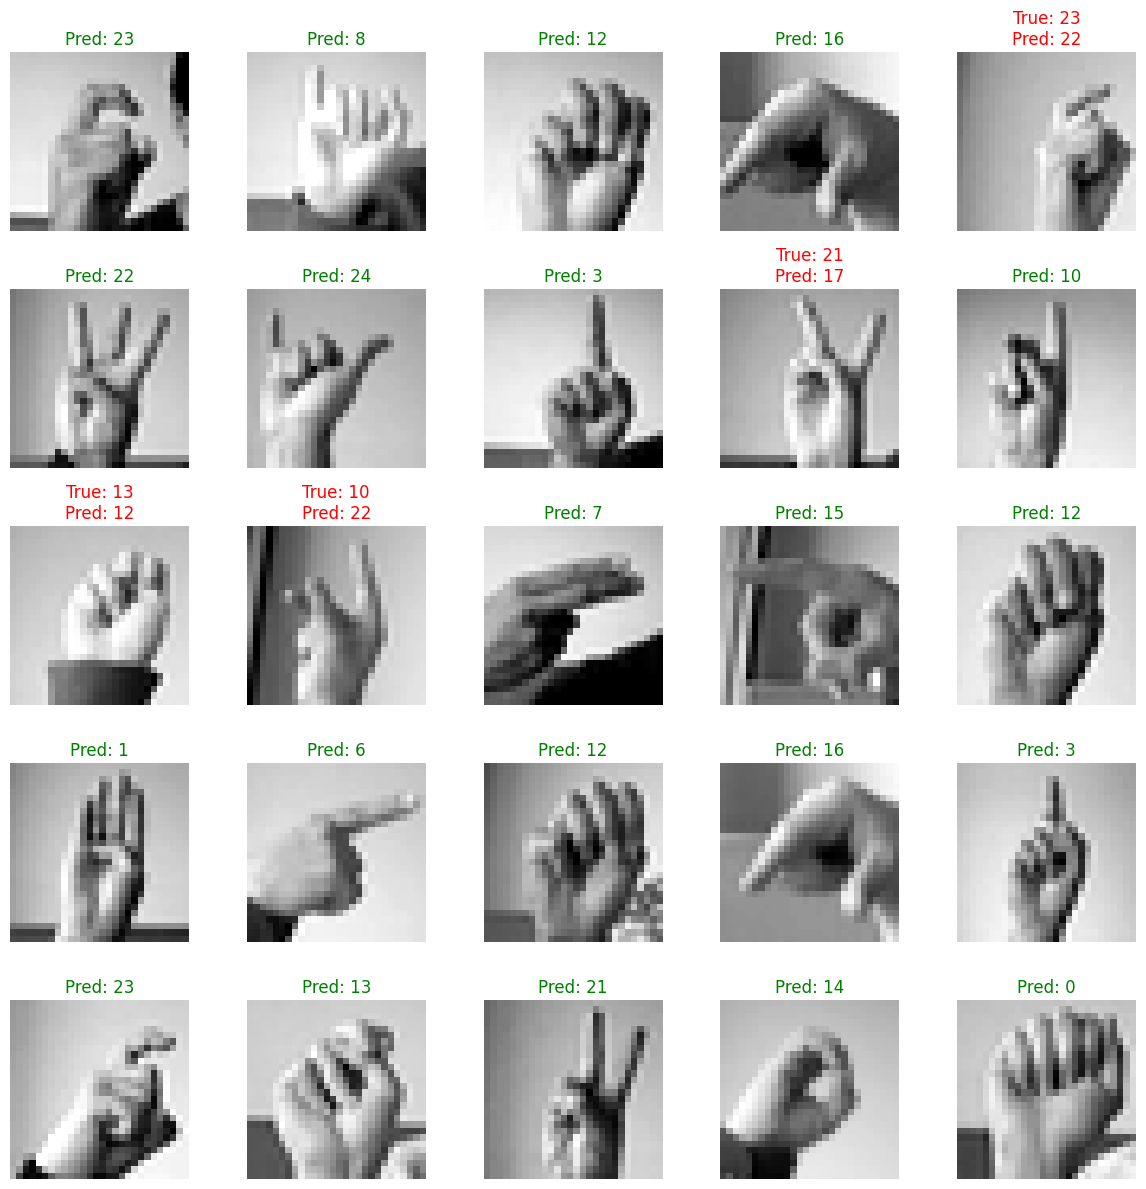

In [ ]:
mostrar_predicciones(x_test, y_true_classes, y_pred_classes2)

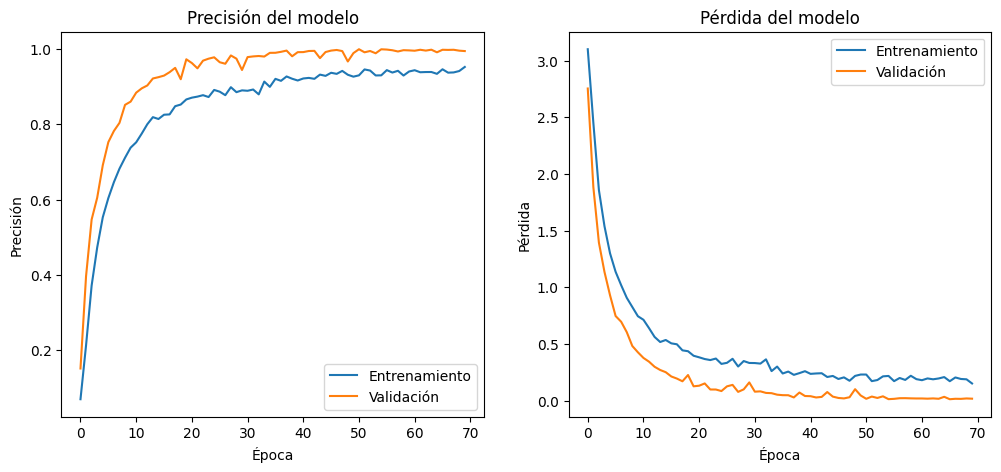

In [ ]:
# Graficar la precisión del modelo
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
# Graficar la pérdida del modelo
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')

In [ ]:
# tercer modelo funcion de activacion tanh, dropout, batch size 256 y optimizador RMSprop
modelo3= Sequential()
modelo3.add(Dense(256, activation='tanh', input_shape=(28*28,)))
modelo3.add(Dropout(0.2))
modelo3.add(Dense(128, activation='tanh'))
modelo3.add(Dropout(0.2))
modelo3.add(Dense(64, activation='tanh'))
modelo3.add(Dropout(0.2))
modelo3.add(Dense(25, activation='softmax'))

modelo3.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

history3 = modelo3.fit(x_train, y_train, epochs=100, batch_size=256, validation_data=(x_val, y_val))

Epoch 1/100
86/86 [==============================] - 2s 20ms/step - loss: 3.0947 - accuracy: 0.1039 - val_loss: 2.3962 - val_accuracy: 0.2482
Epoch 2/100
86/86 [==============================] - 1s 13ms/step - loss: 2.5072 - accuracy: 0.2442 - val_loss: 2.1848 - val_accuracy: 0.3398
Epoch 3/100
86/86 [==============================] - 1s 12ms/step - loss: 2.1782 - accuracy: 0.3325 - val_loss: 2.0512 - val_accuracy: 0.3615
Epoch 4/100
86/86 [==============================] - 1s 13ms/step - loss: 1.9640 - accuracy: 0.3858 - val_loss: 1.8460 - val_accuracy: 0.4682
Epoch 5/100
86/86 [==============================] - 1s 13ms/step - loss: 1.7962 - accuracy: 0.4403 - val_loss: 1.7450 - val_accuracy: 0.4240
Epoch 6/100
86/86 [==============================] - 1s 13ms/step - loss: 1.6752 - accuracy: 0.4677 - val_loss: 1.6166 - val_accuracy: 0.5192
Epoch 7/100
86/86 [==============================] - 1s 13ms/step - loss: 1.5625 - accuracy: 0.5014 - val_loss: 1.3298 - val_accuracy: 0.5899
Epoch 

In [ ]:
test_loss, test_accuracy = modelo3.evaluate(x_test, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")

225/225 [==============================] - 1s 4ms/step - loss: 0.7909 - accuracy: 0.8373
Test accuracy: 0.8372839093208313


In [ ]:
# Predicciones
y_pred3 = modelo3.predict(x_test)
y_pred_classes3 = np.argmax(y_pred3, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)
# Reporte de clasificación
print(classification_report(y_true_classes, y_pred_classes3))

# Matriz de confusión
conf_matrix3 = confusion_matrix(y_true_classes, y_pred_classes3)
print(conf_matrix3)

225/225 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       331
           1       0.95      0.95      0.95       432
           2       0.93      1.00      0.96       310
           3       0.93      0.93      0.93       245
           4       0.88      1.00      0.94       498
           5       0.87      0.91      0.89       247
           6       0.88      0.89      0.88       348
           7       0.95      0.86      0.90       436
           8       0.91      0.75      0.82       288
          10       0.84      0.76      0.80       331
          11       0.91      1.00      0.95       209
          12       0.80      0.79      0.79       394
          13       0.87      0.51      0.64       291
          14       0.85      0.85      0.85       246
          15       0.98      1.00      0.99       347
          16       0.68      0.87      0.77       164
          17       0.33   

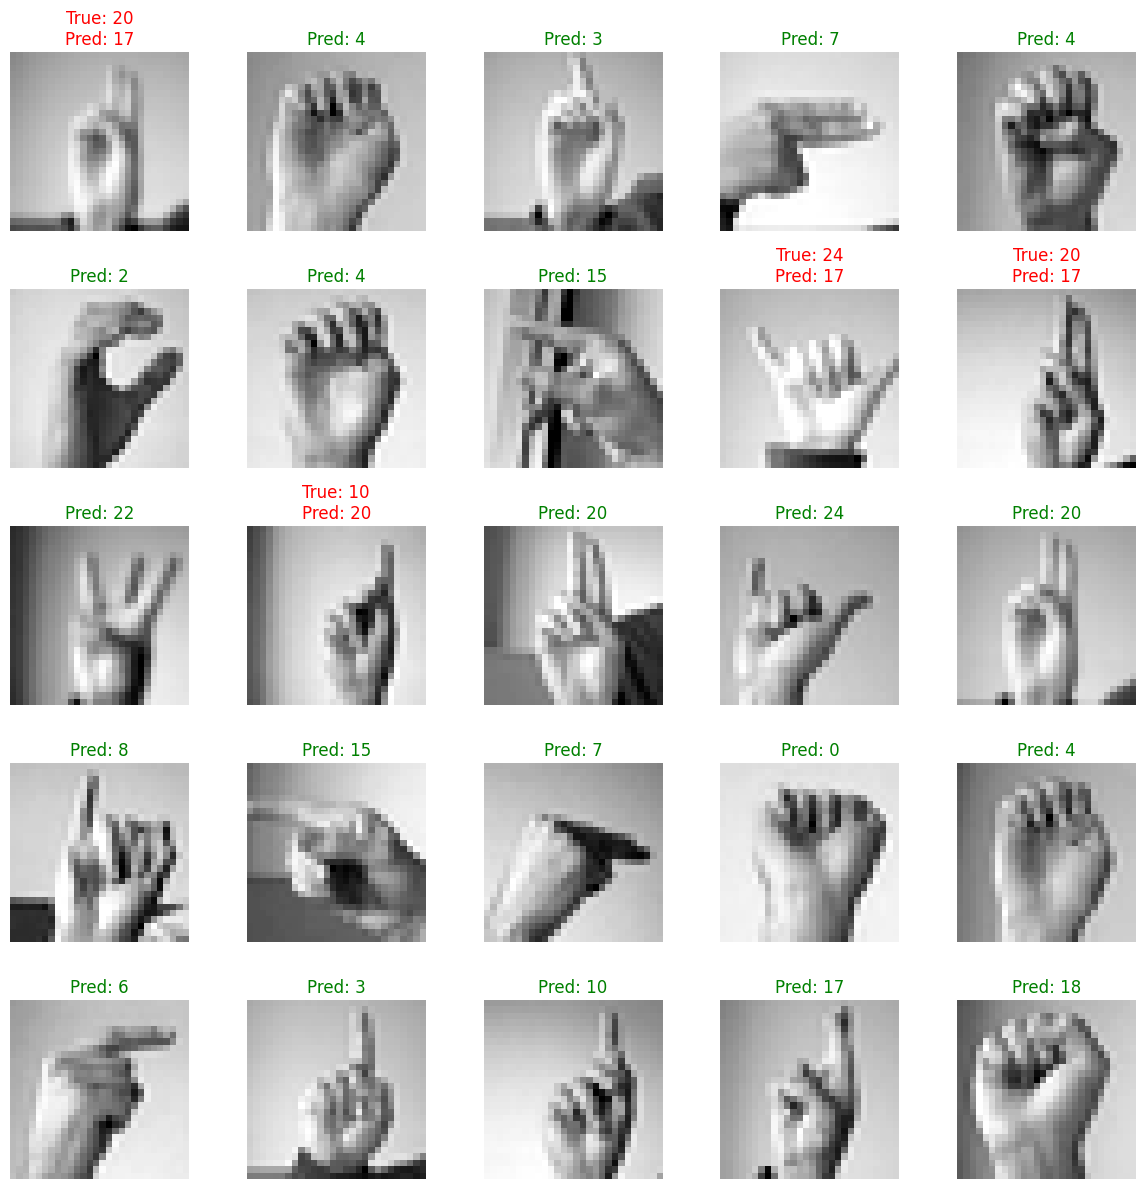

In [ ]:
mostrar_predicciones(x_test, y_true_classes, y_pred_classes3)

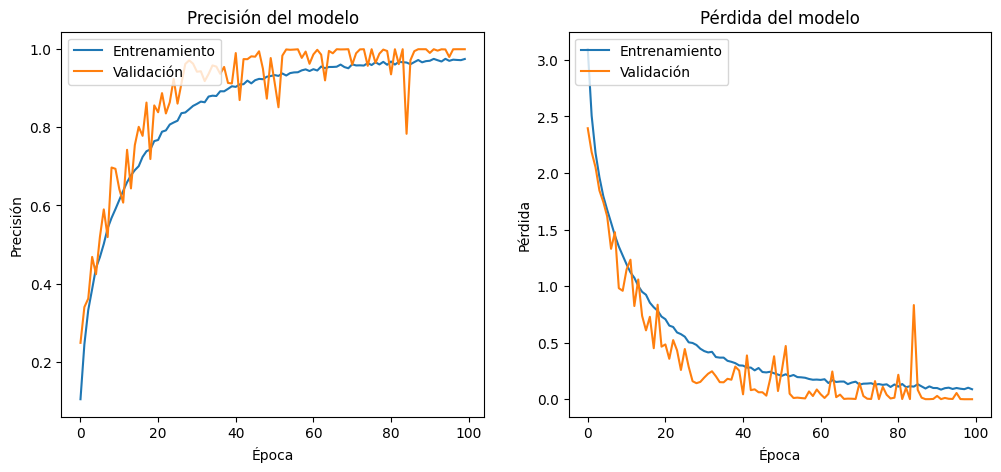

In [ ]:
# Graficar la precisión del modelo
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
# Graficar la pérdida del modelo
plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')